In [127]:
from __future__ import print_function
import os
import numpy as np
import numpy as np


with open("powerBall.txt","r") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [value.strip() for value in content]

# X = np.zeros(len(content),dtype=np.float)
# y = np.zeros((len(content), 69),dtype=np.int)

# index = 0
# for line in content:
#     compontents = line.split('  ')
#     yearString = compontents[0][4:]
#     monthString=compontents[0][:4]
#     ym = yearString+monthString
#     X[index] = int(ym)
    
#     b1 = compontents[1]
#     y[index][int(b1)-1] = 1
    
#     b2 = compontents[2]
#     y[index][int(b2)-1] = 1
    
#     b3 = compontents[3]
#     y[index][int(b3)-1] = 1
    
#     b4 = compontents[4]
#     y[index][int(b4)-1] = 1
    
#     b5 = compontents[5]
#     y[index][int(b5)-1] = 1
    
#     b6 = compontents[6]
#     y[index][int(b6)-1] = 1
#     index+=1
    

# X.reshape(2008,1)
# print(X.shape)
# X = X/20180000


# from keras.models import Sequential
# from keras.layers.core import Dense,Dropout,Activation,Flatten 
# #from keras.optimizers import SGD 
# from keras.optimizers import Adam 




In [128]:
# hidden_size = 1024
# batch_size = 128

# model = Sequential()
# model.add(Dense(hidden_size, input_dim=1,init='normal'))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(69, input_dim=hidden_size,init='normal'))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy',
# optimizer="adam",metrics=["accuracy"])

# model.fit(X, y, nb_epoch=50,batch_size=10,verbose=1)



In [129]:
# x = np.array([20070725])
# model.predict(x)

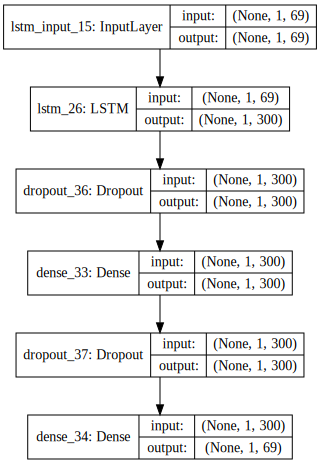

In [130]:
X = np.zeros((len(content), 69),dtype=np.int)
Y = np.zeros((len(content), 69),dtype=np.int)

from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Dense, Embedding, Reshape
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.utils.visualize_util import model_to_dot, plot
from IPython.display import SVG

def lineToVector(line):
    compontents = line.split('  ')
    smallX = np.zeros((69),dtype=np.int)
    b1 = compontents[1]
    smallX[int(b1)-1] = 1
    b2 = compontents[2]
    smallX[int(b2)-1] = 1
    b3 = compontents[3]
    smallX[int(b3)-1] = 1
    b4 = compontents[4]
    smallX[int(b4)-1] = 1
    b5 = compontents[5]
    smallX[int(b5)-1] = 1
    b6 = compontents[6]
    smallX[int(b6)-1] = 1
    return smallX


for i in range(len(content)-1):
    X[i]= lineToVector(content[i])
    Y[i]= lineToVector(content[i+1])
    
XX = np.reshape(X,(len(X),1,69))

trainX = XX[:2000]
trainY = XX[:2000]

testX = XX[2000:]
testY = XX[2000:]


hidden_neurons = 300    

model = Sequential()
model.add(LSTM(hidden_neurons,input_shape=(1,69),return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(hidden_neurons))
model.add(Dropout(0.2))
model.add(Dense(69, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [114]:
model.fit(trainX, trainY, nb_epoch=50,batch_size=10,verbose=1)

Epoch 1/50
2000/2000 [==============================] - 4s - loss: 18.6806     
Epoch 2/50
2000/2000 [==============================] - 3s - loss: 12.5540     
Epoch 3/50
2000/2000 [==============================] - 3s - loss: 11.9995     
Epoch 4/50
2000/2000 [==============================] - 3s - loss: 11.8411     
Epoch 5/50
2000/2000 [==============================] - 3s - loss: 11.7996     
Epoch 6/50
2000/2000 [==============================] - 3s - loss: 11.7580     
Epoch 7/50
2000/2000 [==============================] - 3s - loss: 11.7033     
Epoch 8/50
2000/2000 [==============================] - 3s - loss: 11.6764     
Epoch 9/50
2000/2000 [==============================] - 3s - loss: 11.6696     
Epoch 10/50
2000/2000 [==============================] - 3s - loss: 11.6940     
Epoch 11/50
2000/2000 [==============================] - 3s - loss: 11.6658     
Epoch 12/50
2000/2000 [==============================] - 3s - loss: 11.6464     
Epoch 13/50
2000/2000 [==============

In [139]:
scores = model.evaluate(testX, testY, batch_size=1, verbose=1)

predictXline = "01252017  18  62  66  68  28  22  2"
predictXline = "01282017  46  66  21  18  6  48  2"

predictX = np.array([lineToVector(predictXline)])
print(predictX.shape)
predictX = predictX.reshape(1,1,69)
print(model.predict(predictX)[0][0])
result = model.predict(predictX)[0][0]
print("\n\n\nfinal prediction:",result.argsort()[-6:][::-1])

6/8 [=====================>........] - ETA: 0s(1, 69)
[ 0.01326417  0.01371421  0.01435451  0.01468628  0.01568032  0.0143235
  0.01532715  0.01443908  0.01545342  0.01453522  0.0139757   0.01478776
  0.01439329  0.0156872   0.01485745  0.01459383  0.01317421  0.01380023
  0.01503159  0.01448741  0.01595195  0.01686222  0.01383895  0.01490204
  0.01609357  0.01383984  0.0143151   0.01489734  0.01499226  0.01326164
  0.01564604  0.01413993  0.01522037  0.01445281  0.01455081  0.01346365
  0.01493901  0.01563334  0.01506784  0.01397234  0.01391487  0.01593619
  0.01440942  0.01456722  0.01394369  0.01501158  0.01419436  0.01460259
  0.01548339  0.01419602  0.01442407  0.01546308  0.01254594  0.01360986
  0.01330227  0.01445035  0.013601    0.0149147   0.01475679  0.01333196
  0.01391333  0.01377406  0.01359255  0.01336048  0.01286692  0.01462384
  0.015854    0.0147011   0.01404682]



final prediction: [21 24 20 41 66 13]
